In [11]:
library(dplyr)
library(plotly)

In [12]:
df <- read.csv('2008.csv.bz2')
head(df)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,...,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,2008,1,3,4,2003,1955,2211,2225,WN,335,...,4,8,0,,0,NA,NA,NA,NA,NA
2,2008,1,3,4,754,735,1002,1000,WN,3231,...,5,10,0,,0,NA,NA,NA,NA,NA
3,2008,1,3,4,628,620,804,750,WN,448,...,3,17,0,,0,NA,NA,NA,NA,NA
4,2008,1,3,4,926,930,1054,1100,WN,1746,...,3,7,0,,0,NA,NA,NA,NA,NA
5,2008,1,3,4,1829,1755,1959,1925,WN,3920,...,3,10,0,,0,2,0,0,0,32
6,2008,1,3,4,1940,1915,2121,2110,WN,378,...,4,10,0,,0,NA,NA,NA,NA,NA


### Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)? Which of the listed below is not in your top-10 list?


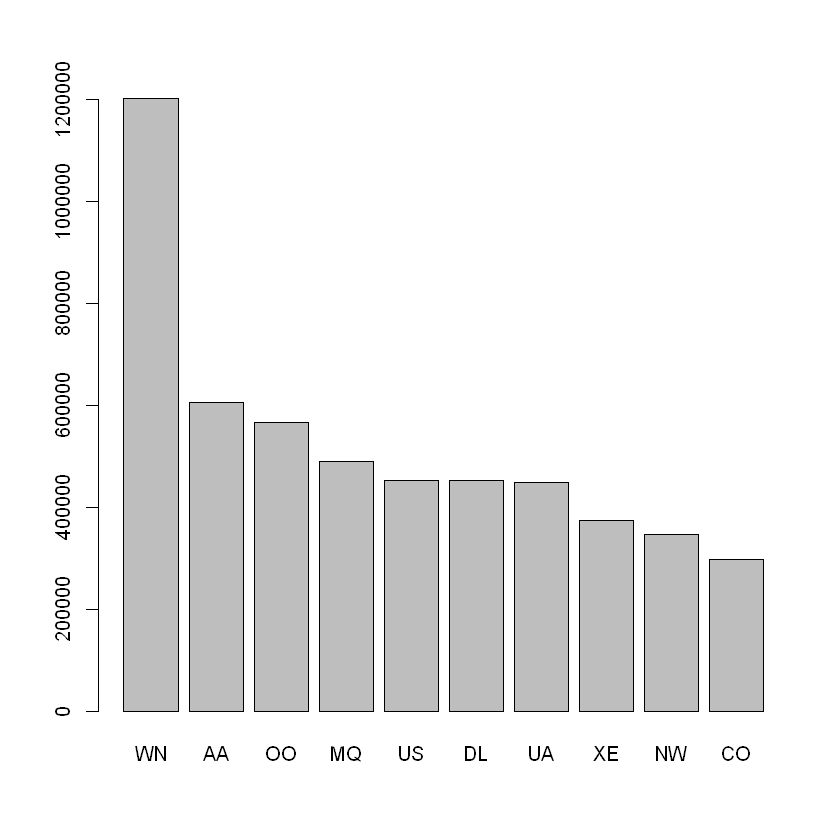

In [27]:
fl <- table(df['UniqueCarrier'])
barplot(sort(fl, decreasing=TRUE)[1:10]) #EV

### What is the most frequent reason for flight cancellation? 

In [14]:
can <- table(df['CancellationCode'])
sort(can, decreasing=TRUE) #B - weather conditions


              B       A       C       D 
6872294   54904   54330   28188      12 

### Which route is the most frequent, in terms of the number of flights?

In [15]:
fame <- df %>% group_by(Origin, Dest) %>% summarise(count = n()) %>% arrange(desc(count))
fame[fame$count == max(fame$count),] #SFO-LAX

Origin,Dest,count
<fct>,<fct>,<int>
SFO,LAX,13788


###  Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.

In [16]:
weath <- df
filter(weath, DepDelay>0) %>% group_by(Origin, Dest) %>% summarize(count = n(), w = length(which(WeatherDelay > 0))) %>% arrange(desc(count)) %>% .[1:5, 'w'] %>% sum()

[1] 668

### Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.

In [17]:
df$DefHour <- df$DepTime %/% 100

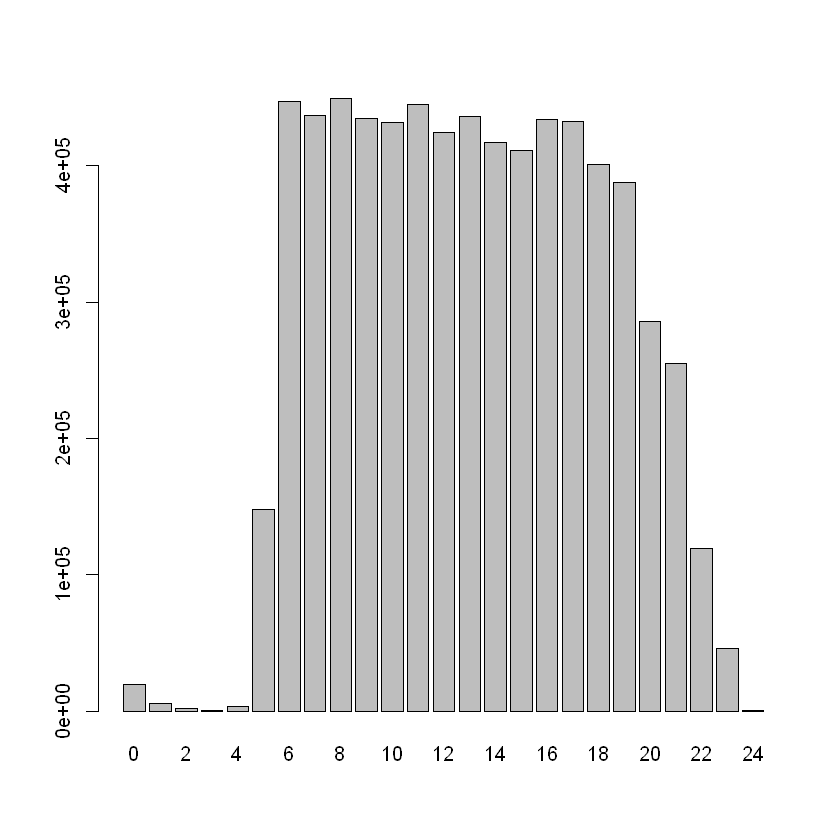

In [26]:
barplot(table(df$DefHour))
#Flights are normally distributed within time interval [0-23]
#In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

### Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.

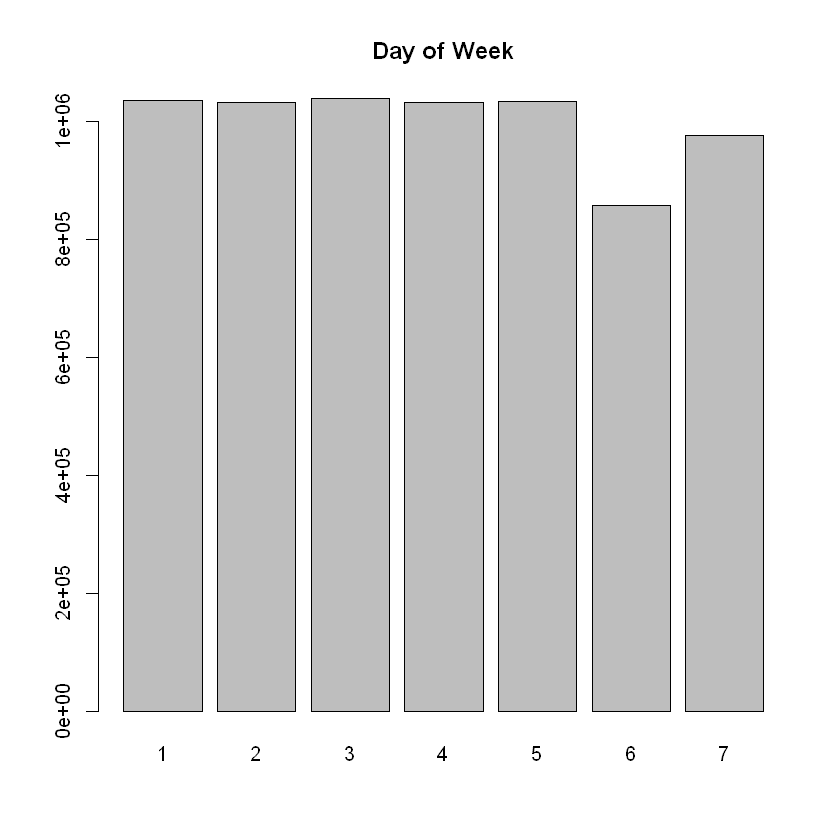

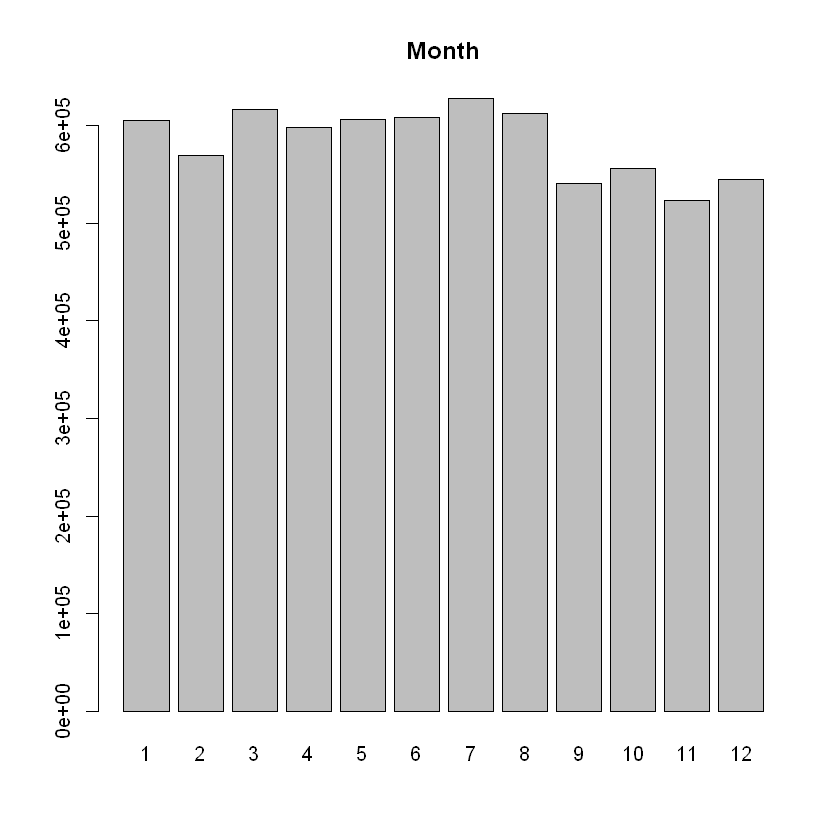

In [30]:
barplot(table(df['DayOfWeek']) , main='Day of Week')
barplot(table(df['Month']), main = 'Month')
#There are less flights during winter than during summer.
#The number of flights during weekends is less than during weekdays (working days)

###  Which month has the greatest number of cancellations due to Carrier?

In [32]:
cancel <- filter(df, CancellationCode == 'A')

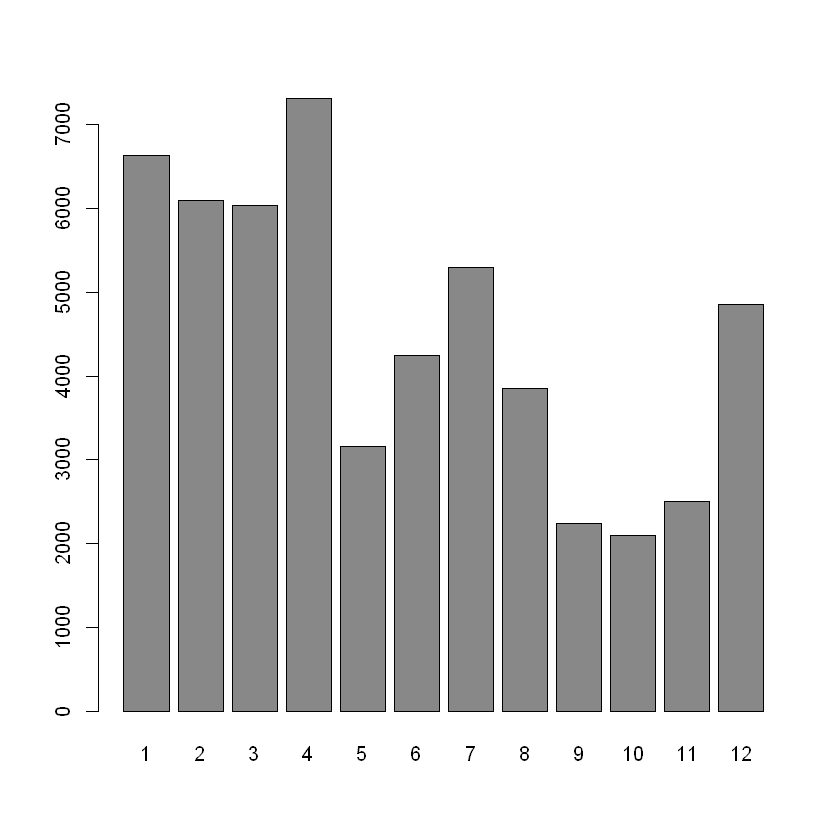

In [35]:
barplot(table(cancel$CancellationCode, cancel$Month)) #April

### Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.

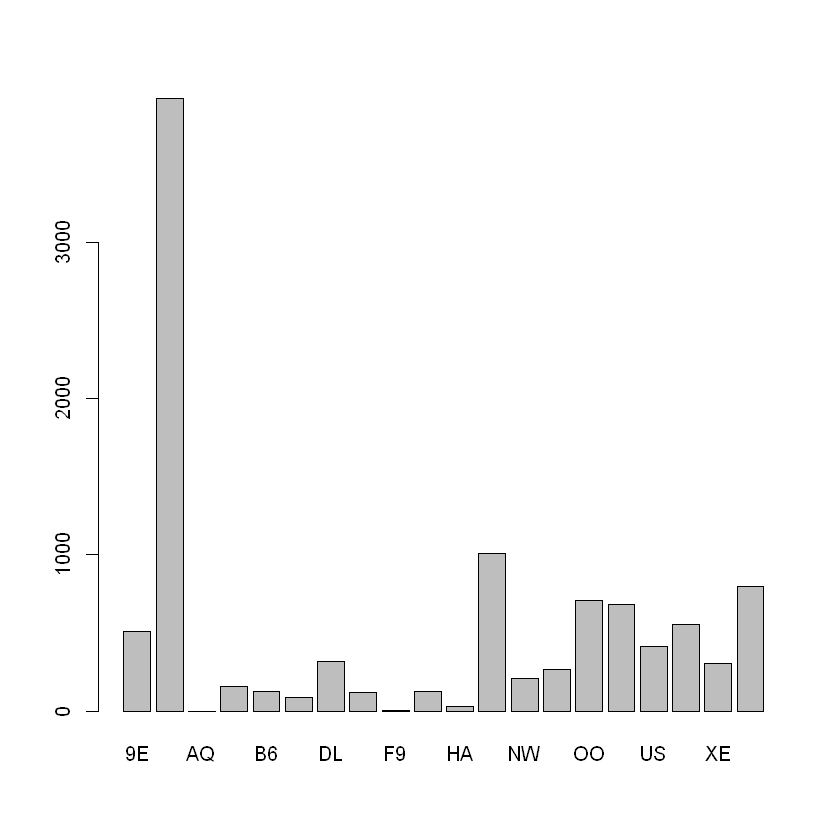

In [64]:
plane <- filter(df, Month == 4 & Cancelled == 1)
barplot(table(plane$UniqueCarrier))

In [65]:
table(plane$UniqueCarrier) ##AA


  9E   AA   AQ   AS   B6   CO   DL   EV   F9   FL   HA   MQ   NW   OH   OO   UA 
 514 3918    0  158  127   87  319  120    7  129   29 1007  209  268  707  682 
  US   WN   XE   YV 
 415  554  304  801 

### Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').

In [94]:
median <- filter(df, df$ArrDelay > 0, df$ArrDelay > 0)
median %>% group_by(UniqueCarrier) %>% summarize(n = median(ArrDelay)) %>% arrange(n) %>% .[1, ]

UniqueCarrier,n
<fct>,<dbl>
AQ,5


In [93]:
median %>% group_by(UniqueCarrier) %>% summarize(n = median(DepDelay)) %>% arrange(n) %>% .[1, ] #AQ

UniqueCarrier,n
<fct>,<dbl>
AQ,2


###  Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.

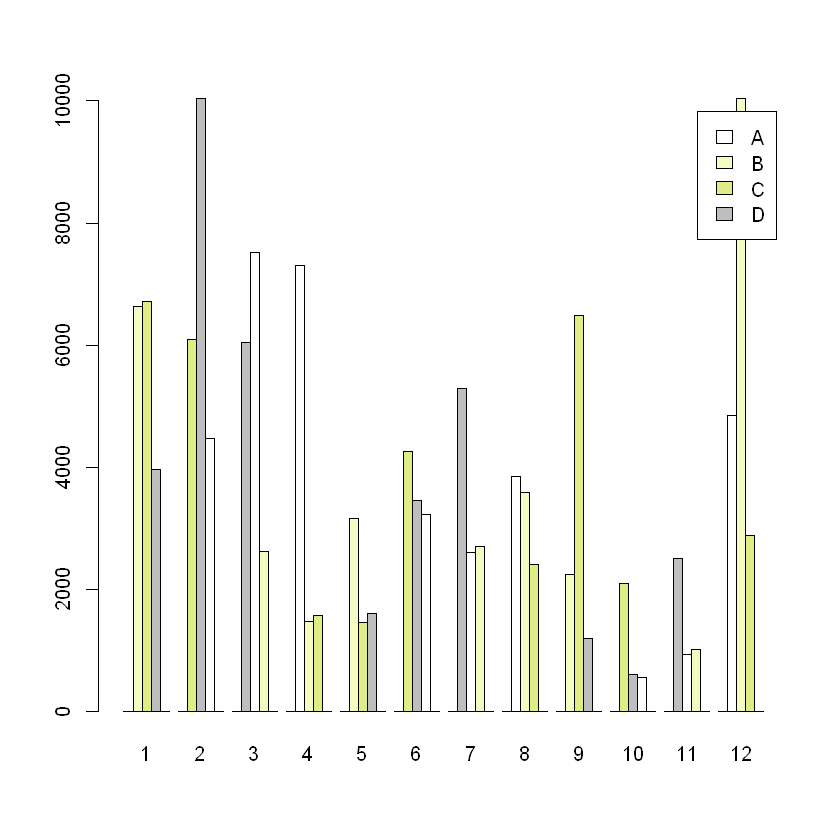

In [155]:
can <- df[df$Cancelled == 1, c('CancellationCode','Month')]
colors <- c('#FFFFFF', '#F5FCC2', '#E0ED87', '718200')
barplot(table(can$CancellationCode, can$Month), beside = TRUE, col = colors, legend = levels(can$CancellationCode)[2:5])
#December has the highest rate of cancellations due to weather.
#April's top cancellation reason is carriers.